# Day 08. Exercise 05
# Clustering

## 0. Imports

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [128]:
df = pd.read_csv('../../datasets/regression.csv').drop('pageviews',axis=1)
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [129]:
X = df[['num_commits','AVG(diff)']]

0.3954350435152892


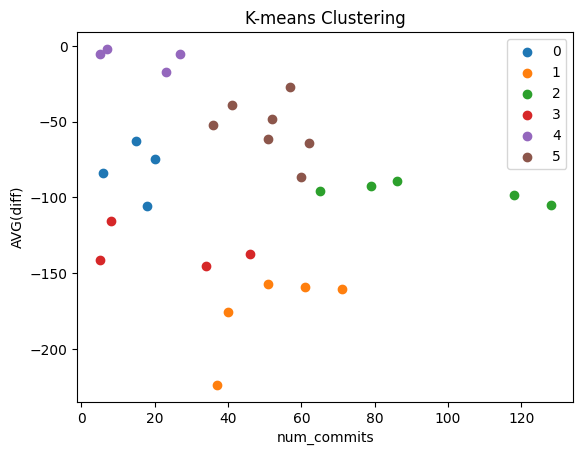

In [130]:
km = KMeans(n_clusters = 6,random_state=21)
y_pred = km.fit_predict(X)
silhouette = silhouette_score(X, y_pred)
print(silhouette)
for cluster in range(6):
    cdf = df[y_pred == cluster]
    plt.scatter(cdf['num_commits'],cdf['AVG(diff)'],label= cluster)
plt.title('K-means Clustering')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.legend()
plt.show()

0.4454402135233297


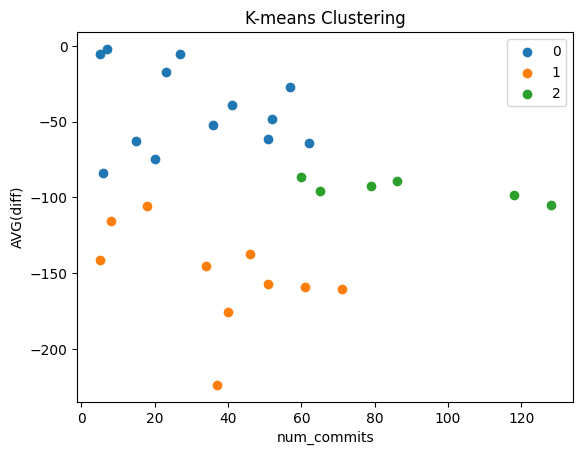

In [131]:
km = KMeans(n_clusters = 3,random_state=21)
y_pred = km.fit_predict(X)
silhouette = silhouette_score(X, y_pred)
print(silhouette)
for cluster in range(3):
    cdf = df[y_pred == cluster]
    plt.scatter(cdf['num_commits'],cdf['AVG(diff)'],label= cluster)
plt.title('K-means Clustering')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.legend()
plt.show()

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

0.38339641455696616


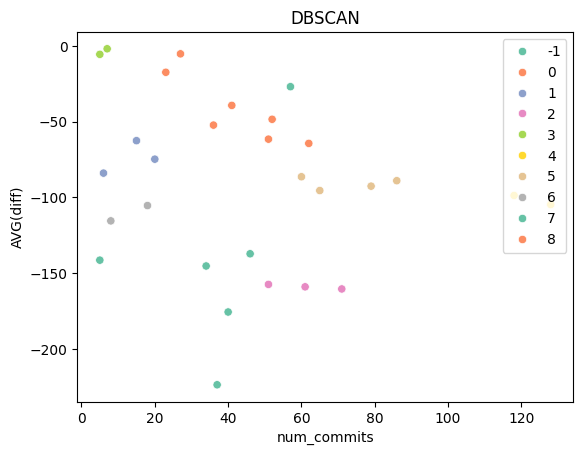

In [132]:
db = DBSCAN(eps=20,min_samples=2)
y_pred = db.fit_predict(X)
silhouette = silhouette_score(X, y_pred)
print(silhouette)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y_pred, palette="Set2")
plt.title('DBSCAN')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.legend()
plt.show()

0.48713041554757475


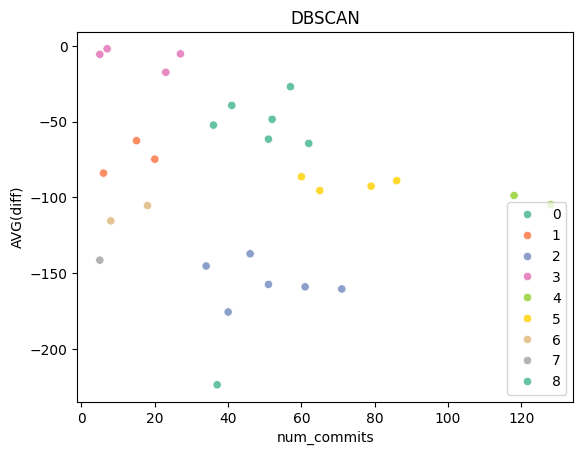

In [133]:
db = DBSCAN(eps=22,min_samples=1)
y_pred = db.fit_predict(X)
silhouette = silhouette_score(X, y_pred)
print(silhouette)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y_pred, palette="Set2")
plt.title('DBSCAN')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.legend()
plt.show()

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

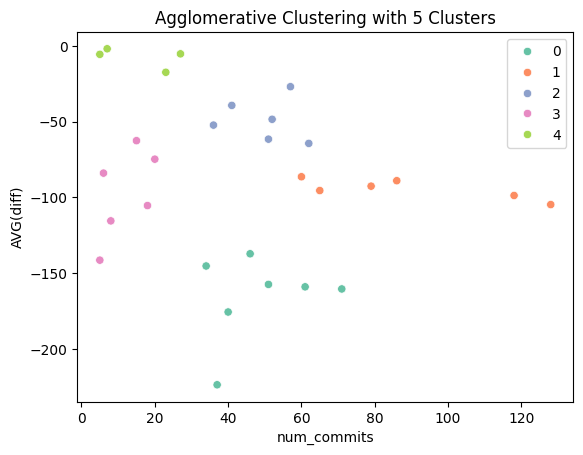

In [134]:
aglomerative = AgglomerativeClustering(n_clusters=5)
y_pred = aglomerative.fit_predict(X)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y_pred, palette="Set2")
plt.title("Agglomerative Clustering with 5 Clusters")
plt.xlabel("num_commits")
plt.ylabel("AVG(diff)")
plt.show()

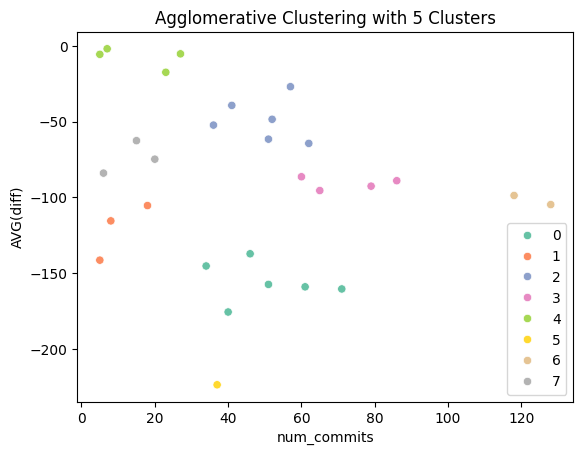

In [135]:
aglomerative = AgglomerativeClustering(n_clusters=8)
y_pred = aglomerative.fit_predict(X)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y_pred, palette="Set2")
plt.title("Agglomerative Clustering with 5 Clusters")
plt.xlabel("num_commits")
plt.ylabel("AVG(diff)")
plt.show()

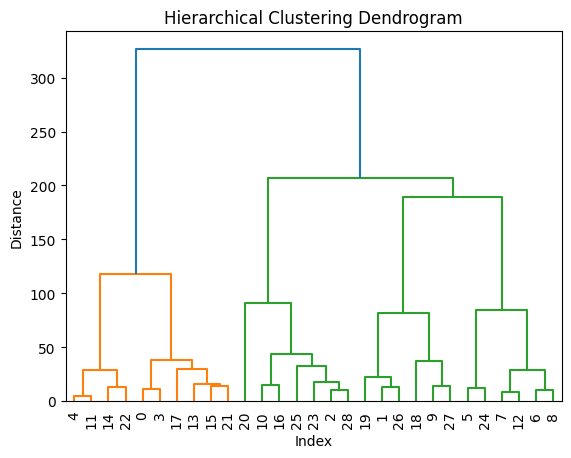

In [136]:
linked = linkage(X, method='ward')
dendrogram(linked, orientation='top', leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [141]:
 
def optimize_clastering_parameter(model_class, params, param_name, param_range):
    scores = []
    best_param = None
    best_score = 0

    for value in param_range:
        params.update({param_name : value})
        model = model_class(**params)
        labels = model.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        scores.append(silhouette_avg)
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_param = value
    plt.figure(figsize=(15, 8))
    plt.subplot(1,2,1)
    plt.plot(param_range, scores, marker='o')
    plt.xlabel(param_name.capitalize())
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score changes')

    params.update({param_name: best_param})
    model = model_class(**params)
    labels = model.fit_predict(X)
    plt.subplot(1,2,2)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="Set2")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f'Best {param_name} Value: {best_param}')
    plt.show()
    return best_param, best_score

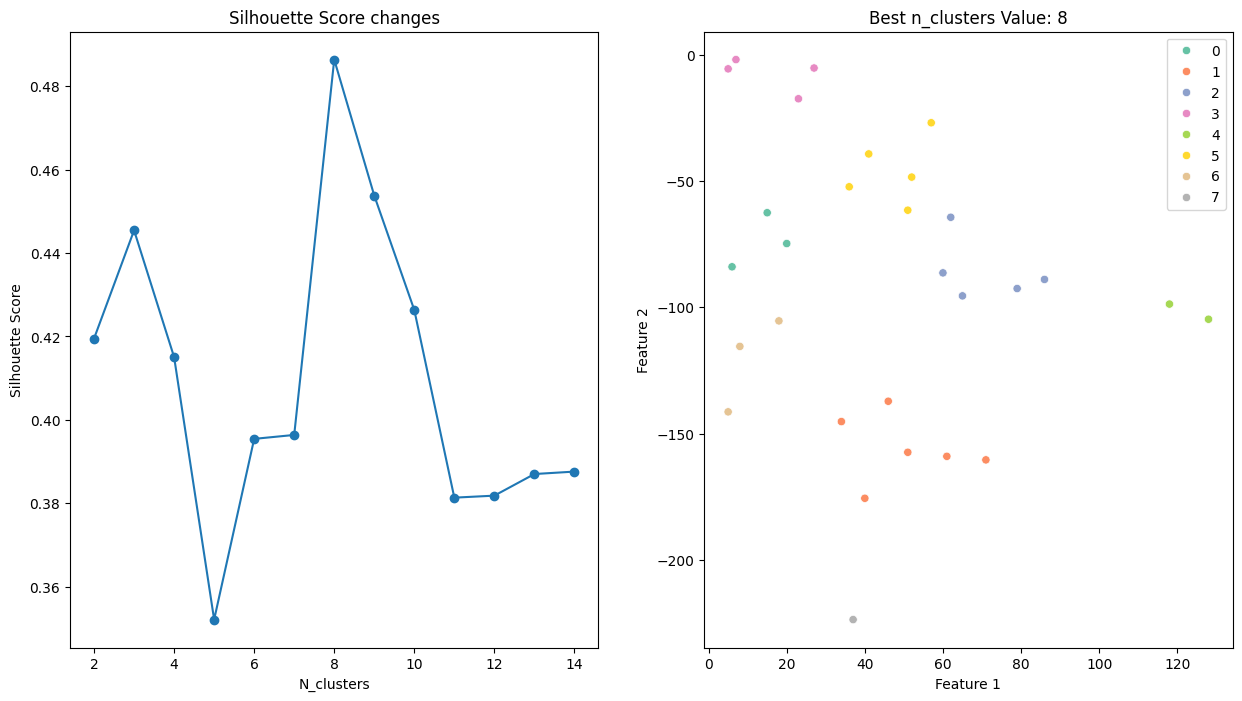

(8, np.float64(0.48638087320227846))

In [145]:
X = df[['num_commits','AVG(diff)']].values
optimize_clastering_parameter(KMeans,{'random_state': 21}, 'n_clusters', list(range(2,15)))

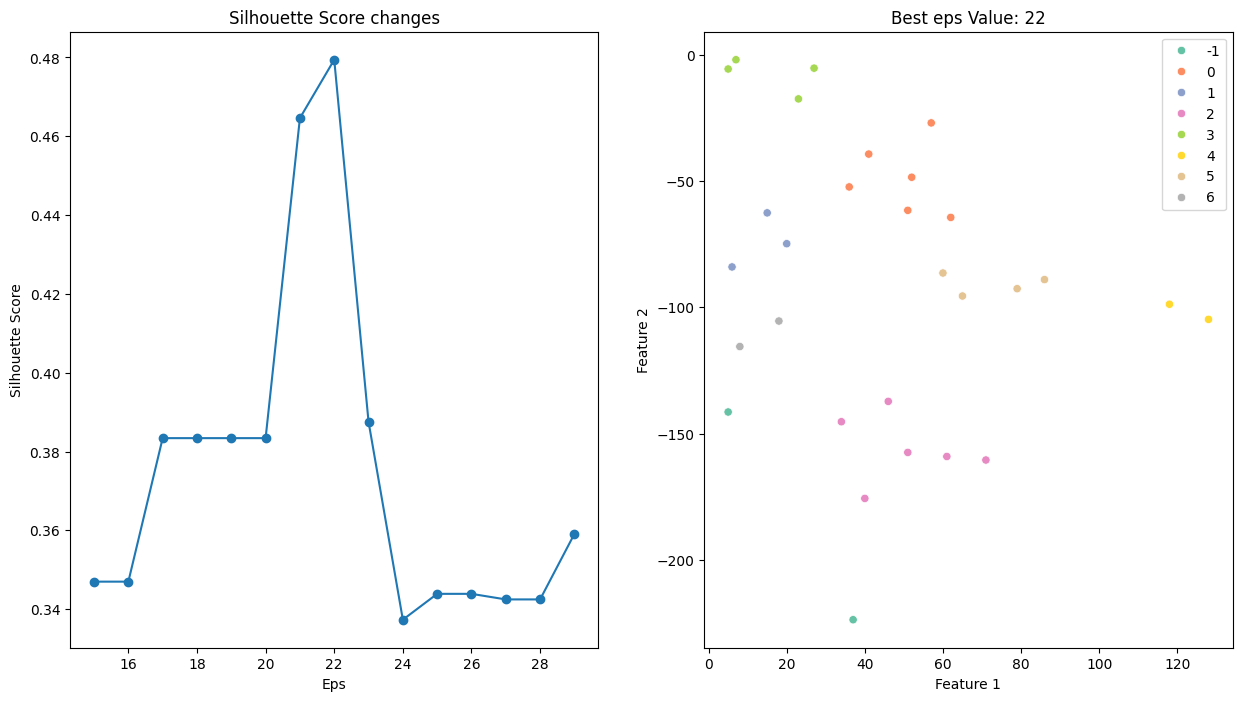

(22, np.float64(0.4794129092034348))

In [152]:
optimize_clastering_parameter(DBSCAN,{'min_samples': 2}, 'eps', list(range(15,30)))

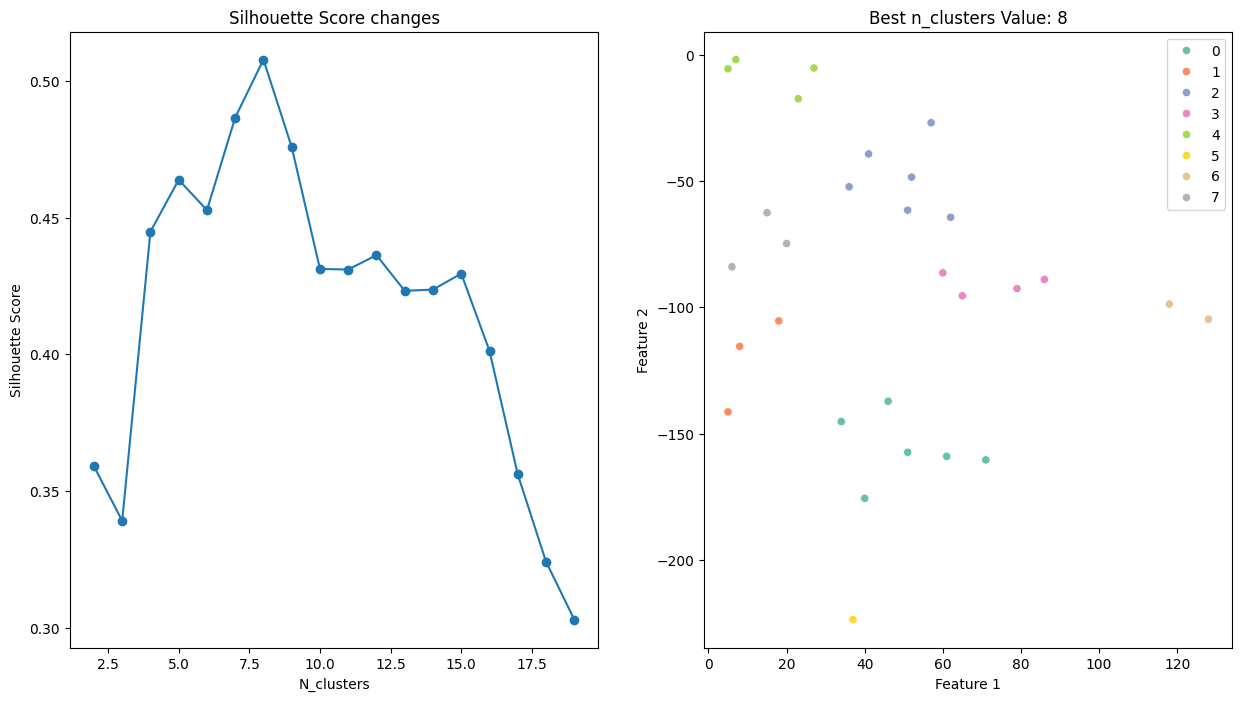

(8, np.float64(0.50779855565622))

In [159]:
optimize_clastering_parameter(AgglomerativeClustering,{}, 'n_clusters', list(range(2,20)))